# FLIPKART MOBILE PRODUCT PRICE ANALYSIS BASED ON FEATURES AND BRANDS.

## Import Requried library

In [2]:
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# WEB SCRAPING

## Requried empty Lists need to be extracted

In [10]:
brand=[]
model=[]
ROM=[]
RAM=[]
processor=[]
displaySize=[]
Backcamera=[]
Battery=[]
Frontcamera=[]
price=[]
ratings=[]
color=[]

## Requried regex functions for extraction of data

In [11]:
for i in range(1, 101):
    url=f"https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_2_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_2_0_na_na_na&as-pos=2&as-type=HISTORY&suggestionId=mobiles&requestId=0a0d105f-16b3-41f2-9007-1b47bd60de7a&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DGoogle&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3Dvivo&p%5B%5D=facets.brand%255B%255D%3DOPPO&p%5B%5D=facets.brand%255B%255D%3DInfinix&p%5B%5D=facets.brand%255B%255D%3DNothing&p%5B%5D=facets.brand%255B%255D%3DPOCO&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.brand%255B%255D%3DREDMI&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DOnePlus&p%5B%5D=facets.brand%255B%255D%3DIQOO&p%5B%5D=facets.brand%255B%255D%3DASUS&p%5B%5D=facets.brand%255B%255D%3DTecno&p%5B%5D=facets.brand%255B%255D%3DMicromax&p%5B%5D=facets.brand%255B%255D%3DHonor&p%5B%5D=facets.brand%255B%255D%3DLenovo&page={i}"
    request_header= {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}
    print(url)
    page=requests.get(url,headers=request_header)
    soup=BeautifulSoup(page.text,"lxml")
    for i in soup.find_all("div",class_="KzDlHZ"):
            text=i.text
            regex1=re.findall("^[A-Za-z]+",text)
            if regex1:
                brand.append(regex1[0])
            else:
                brand.append(np.nan)

                
    for i in soup.find_all("div",class_="KzDlHZ"):
            text=i.text
            regex2=re.findall("^[a-zA-Z1-9]+(\s.+)\(",text)
            if regex2:
                model.append(regex2[0])
            else:
                model.append(np.nan)


    for i in soup.find_all("div",class_="KzDlHZ"):
            text=i.text
            regex3=re.findall(",\s([1-9]+)",text)
            if regex3:
                ROM.append(regex3[0])
            else:
                ROM.append(np.nan)


    for i in soup.find_all("div",class_="_6NESgJ"):
            text=i.text
            regex4=re.findall("^([1-9]+).+RAM",text)
            if regex4:
                RAM.append(regex4[0])
            else:
                RAM.append(np.nan)

    
    for i in soup.find_all("div",class_="_6NESgJ"):
            text=i.text
            regex5=re.findall("Battery(.+)Processor",text)
            if regex5:
              processor.append(regex5[0])
            else:
               processor.append(np.nan) 

    
    for i in soup.find_all("div",class_="_6NESgJ"):
            text=i.text
            regex6=re.findall("\((.+)inch",text)
            if regex6:
              displaySize.append(regex6[0])
            else:
               displaySize.append(np.nan)
    
    
    for i in soup.find_all("div",class_="_6NESgJ"):
            text=i.text
            regex7=re.findall("([0-9]+)\smAh",text)
            if regex7:
                Battery.append(regex7[0])
            else:
                Battery.append(np.nan)

    
    for i in soup.find_all("div",class_="_6NESgJ"):
            text=i.text
            regex8=re.findall("Display(.+)\|",text)
            if regex8:
                Backcamera.append(regex8[0])
            else:
                Backcamera.append(np.nan)
    
    
    for i in soup.find_all("div",class_="_6NESgJ"):
            text=i.text
            regex9=re.findall("Display.+\|(.+)Front",text)
            if regex9:
                Frontcamera.append(regex9[0])
            else:
                Frontcamera.append(np.nan)

    for i in soup.find_all("div",class_="KzDlHZ"):
            text=i.text
            regex10=re.findall("\(([^,]+),",text)
            if regex10:
                color.append(regex10[0])
            else:
                color.append(np.nan)
                
    for i in soup.find_all("div",class_="Nx9bqj _4b5DiR"):
            text=i.text
            price.append(text)
    while len(price) < len(brand):  
            price.append(np.nan)    

    for i in soup.find_all("span", class_="Wphh3N"):
            text = i.text.strip()  
            if text == "": 
                    ratings.append("0")
            else:
                    ratings.append(text.split()[0]) 
    while len(ratings) < len(brand):  
        ratings.append("0")            
    

https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_2_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_2_0_na_na_na&as-pos=2&as-type=HISTORY&suggestionId=mobiles&requestId=0a0d105f-16b3-41f2-9007-1b47bd60de7a&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DGoogle&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3Dvivo&p%5B%5D=facets.brand%255B%255D%3DOPPO&p%5B%5D=facets.brand%255B%255D%3DInfinix&p%5B%5D=facets.brand%255B%255D%3DNothing&p%5B%5D=facets.brand%255B%255D%3DPOCO&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.brand%255B%255D%3DREDMI&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DOnePlus&p%5B%5D=facets.brand%255B%255D%3DIQOO&p%5B%5D=facets.brand%255B%255D%3DASUS&p%5B%5D=facets.brand%255B%255D%3DTecno&p%5B%5D=facets.brand%255B%255D%3DMicromax&p%5B%5D=facets.brand%255B%255D%3DHonor&p%5B%5D=facets.brand%255B%255D%3DLenovo&page=1
https://www.flipkart.com/se

## Convert data in to DataFrame

In [12]:
MobilesSheet=pd.DataFrame({"brand":brand,"model":model,"color":color,"ram":RAM,"rom":ROM,"processor":processor,"display_size":displaySize,"frontcamera":Frontcamera,"backcamera":Backcamera,"battery":Battery,"display_size":displaySize,"price":price,"ratings":ratings})
MobilesSheet

,brand,model,color,ram,rom,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,realme,P2 Pro 5G,Parrot Green,12,256,7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,SAMSUNG,Galaxy F05,Twilight Blue,4,64,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,g45 5G,Viva Magenta,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,g45 5G,Brilliant Blue,4,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,g45 5G,Brilliant Green,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...
979,vivo,Y28s 5G,Vintage Red,6,128,NaN,6.56,NaN,NaN,5000,"₹21,999",771
980,Mi,11 Lite,Vinyl Black,6,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,11 Lite,Vinyl Black,8,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"
982,POCO,M5,Yellow,6,128,Mediatek Helio G99,6.58,8MP,50MP + 2MP Depth Sensor + 2MP Macro Sensor,5000,"₹12,999","21,195"


In [107]:
 # MobilesSheet.to_csv("D:/Datasets/data/Flipkart_mobile.csv")

# DATA CLEANING AND MANIPULATION

In [334]:
df_copy = MobilesSheet.copy()

In [335]:
df_copy

,brand,model,color,ram,rom,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,realme,P2 Pro 5G,Parrot Green,12,256,7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,SAMSUNG,Galaxy F05,Twilight Blue,4,64,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,g45 5G,Viva Magenta,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,g45 5G,Brilliant Blue,4,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,g45 5G,Brilliant Green,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...
979,vivo,Y28s 5G,Vintage Red,6,128,NaN,6.56,NaN,NaN,5000,"₹21,999",771
980,Mi,11 Lite,Vinyl Black,6,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,11 Lite,Vinyl Black,8,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"
982,POCO,M5,Yellow,6,128,Mediatek Helio G99,6.58,8MP,50MP + 2MP Depth Sensor + 2MP Macro Sensor,5000,"₹12,999","21,195"


## Removing all NULL values present in Dataset

In [336]:
df = df_copy.dropna()

In [337]:
df

,brand,model,color,ram,rom,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,realme,P2 Pro 5G,Parrot Green,12,256,7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,SAMSUNG,Galaxy F05,Twilight Blue,4,64,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,g45 5G,Viva Magenta,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,g45 5G,Brilliant Blue,4,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,g45 5G,Brilliant Green,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...
975,POCO,M6 Plus 5G,Graphite Black,6,128,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,vivo,V25 Pro 5G,Sailing Blue,8,128,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,11 Lite,Vinyl Black,6,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,11 Lite,Vinyl Black,8,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


## Cleaning of brand column

In [338]:
print(df["brand"].unique())

['realme' 'SAMSUNG' 'Motorola' 'POCO' 'MOTOROLA' 'REDMI' 'Infinix' 'OPPO'
 'vivo' 'Tecno' 'IQOO' 'Nothing' 'Google' 'Samsung' 'Redmi' 'Xiaomi'
 'Honor' 'Micromax' 'Mi']


In [339]:
df["brand"] = df["brand"].str.capitalize()

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\4096611980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["brand"] = df["brand"].str.capitalize()


In [340]:
print(df["brand"].unique())

['Realme' 'Samsung' 'Motorola' 'Poco' 'Redmi' 'Infinix' 'Oppo' 'Vivo'
 'Tecno' 'Iqoo' 'Nothing' 'Google' 'Xiaomi' 'Honor' 'Micromax' 'Mi']


## Adding device_name column using brand and model

In [341]:
df["device_name"] = df["brand"] + df["model"]

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\891992077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["device_name"] = df["brand"] + df["model"]


In [343]:
df

,brand,model,color,ram,rom,processor,display_size,frontcamera,backcamera,battery,price,ratings,device_name
0,Realme,P2 Pro 5G,Parrot Green,12,256,7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885",Realme P2 Pro 5G
1,Samsung,Galaxy F05,Twilight Blue,4,64,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063",Samsung Galaxy F05
2,Motorola,g45 5G,Viva Magenta,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608",Motorola g45 5G
3,Motorola,g45 5G,Brilliant Blue,4,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083",Motorola g45 5G
4,Motorola,g45 5G,Brilliant Green,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608",Motorola g45 5G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,M6 Plus 5G,Graphite Black,6,128,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989",Poco M6 Plus 5G
978,Vivo,V25 Pro 5G,Sailing Blue,8,128,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619",Vivo V25 Pro 5G
980,Mi,11 Lite,Vinyl Black,6,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262",Mi 11 Lite
981,Mi,11 Lite,Vinyl Black,8,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425",Mi 11 Lite


In [344]:
col = df.pop('device_name') 
df.insert(1, 'device_name', col) 
df


,brand,device_name,model,color,ram,rom,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


## Adding is_5g column using model

In [363]:
df["is_5g"] = df['model'].str.contains('5G', case=False, na=False)

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\3489366597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_5g"] = df['model'].str.contains('5G', case=False, na=False)


In [364]:
df

,brand,device_name,model,color,ram,rom,processor,display_size,frontcamera,backcamera,battery,price,ratings,is_5g
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885",True
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063",False
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608",True
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083",True
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989",True
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619",True
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262",False
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425",False


In [365]:
col = df.pop('is_5g')
df.insert(6, 'is_5g', col) 
df

,brand,device_name,model,color,ram,rom,is_5g,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Qualcomm Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


## Cleaning of processor column

In [366]:
df["processor"] = df["processor"].replace(["Qualcomm", "Qualcomm SM6450", "SM6450", "Qualcomm SM8550-AC", "SM8550-AC", "ARM Cortex A75 Octa Core Processor", "Samsung"], "", regex=True)
df

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\2822669169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["processor"] = df["processor"].replace(["Qualcomm", "Qualcomm SM6450", "SM6450", "Qualcomm SM8550-AC", "SM8550-AC", "ARM Cortex A75 Octa Core Processor", "Samsung"], "", regex=True)


,brand,device_name,model,color,ram,rom,is_5g,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


In [367]:
df["processor"] = df["processor"].apply(lambda x: "Snapdragon " + x if ("8 Elite" in x or "Gen" in x) and "Snapdragon" not in x else x)
df

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\1475989256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["processor"] = df["processor"].apply(lambda x: "Snapdragon " + x if ("8 Elite" in x or "Gen" in x) and "Snapdragon" not in x else x)


,brand,device_name,model,color,ram,rom,is_5g,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon 7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


In [368]:
df["processor"] = df["processor"].apply(lambda x: "Snapdragon " + x if ("695" in x or "778G" in x) and "Snapdragon" not in x else x)
df

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\1050322232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["processor"] = df["processor"].apply(lambda x: "Snapdragon " + x if ("695" in x or "778G" in x) and "Snapdragon" not in x else x)


,brand,device_name,model,color,ram,rom,is_5g,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon 7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


In [369]:
df['processor'] = df['processor'].apply(
    lambda x: f"Mediatek {x}" if pd.notnull(x) and "Dimensity" in x and not x.startswith("Mediatek") else x)
df

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\4200812209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processor'] = df['processor'].apply(


,brand,device_name,model,color,ram,rom,is_5g,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon 7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


In [370]:
df['processor'] = df['processor'].apply(
    lambda x: f"Mediatek {x}" if pd.notnull(x) and "Helio" in x and not x.startswith("Mediatek") else x)
df

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\1106026469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processor'] = df['processor'].apply(


,brand,device_name,model,color,ram,rom,is_5g,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon 7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Mediatek Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


In [371]:
df["processor"] = df["processor"].apply(lambda x: "Mediatek " + x if "MT" in x else "Unisoc " + x if "T" in x and "Unisoc" not in x else x)
df

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\175830542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["processor"] = df["processor"].apply(lambda x: "Mediatek " + x if "MT" in x else "Unisoc " + x if "T" in x and "Unisoc" not in x else x)


,brand,device_name,model,color,ram,rom,is_5g,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon 7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Mediatek Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


## Adding processor_brand column using processor

In [373]:
df['processor_brand'] = df['processor'].str.split().str[0]
df

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\732833801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processor_brand'] = df['processor'].str.split().str[0]


,brand,device_name,model,color,ram,rom,is_5g,processor,display_size,frontcamera,backcamera,battery,price,ratings,processor_brand
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon 7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885",Snapdragon
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Mediatek Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063",Mediatek
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608",Snapdragon
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083",Snapdragon
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608",Snapdragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989",Snapdragon
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619",Mediatek
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262",Snapdragon
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425",Snapdragon


In [374]:
col = df.pop('processor_brand') 
df.insert(7, 'processor_brand', col) 
df

,brand,device_name,model,color,ram,rom,is_5g,processor_brand,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon,Snapdragon 7s Gen2,6.7,32MP,50MP + 8MP,5200,"₹21,999","4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Mediatek,Mediatek Helio G85,6.74,8MP,50MP + 2MP,5000,"₹6,499","29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹9,999","24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,"₹11,999","91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,"₹54,999","23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,"₹14,180","7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹23,999","13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,"₹14,499","6,425"


## Cleaning the price column

In [377]:
df["price"]=df["price"].astype(str).str.replace("₹", "").str.replace(",", "").astype(int)

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\4011695720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"]=df["price"].astype(str).str.replace("₹", "").str.replace(",", "").astype(int)


In [378]:
df

,brand,device_name,model,color,ram,rom,is_5g,processor_brand,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon,Snapdragon 7s Gen2,6.7,32MP,50MP + 8MP,5200,21999,"4,885"
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Mediatek,Mediatek Helio G85,6.74,8MP,50MP + 2MP,5000,6499,"29,063"
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,11999,"91,608"
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,9999,"24,083"
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,11999,"91,608"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,54999,"23,989"
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,14180,"7,619"
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,23999,"13,262"
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,14499,"6,425"


## Cleaning the ratings column

In [379]:
df['ratings'] = df['ratings'].astype(str).str.replace(',', '').astype(int)

C:\Users\91876\AppData\Local\Temp\ipykernel_15344\2391893049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings'] = df['ratings'].astype(str).str.replace(',', '').astype(int)


In [380]:
df

,brand,device_name,model,color,ram,rom,is_5g,processor_brand,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon,Snapdragon 7s Gen2,6.7,32MP,50MP + 8MP,5200,21999,4885
1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Mediatek,Mediatek Helio G85,6.74,8MP,50MP + 2MP,5000,6499,29063
2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,11999,91608
3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,9999,24083
4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon,Snapdragon 6s Gen 3,6.5,16MP,50MP + 2MP,5000,11999,91608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,54999,23989
978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,14180,7619
980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,23999,13262
981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,14499,6425


In [3]:
df = pd.read_csv(r"D:/Datasets/data/Flipkart_mobile_5.csv")

In [4]:
df

,Unnamed: 0,brand,device_name,model,color,ram,rom,is_5g,processor_brand,processor,display_size,frontcamera,backcamera,battery,price,ratings
0,0,Realme,Realme P2 Pro 5G,P2 Pro 5G,Parrot Green,12,256,True,Snapdragon,Snapdragon 7s Gen2,6.70,32MP,50MP + 8MP,5200,21999,4885
1,1,Samsung,Samsung Galaxy F05,Galaxy F05,Twilight Blue,4,64,False,Mediatek,Mediatek Helio G85,6.74,8MP,50MP + 2MP,5000,6499,29063
2,2,Motorola,Motorola g45 5G,g45 5G,Viva Magenta,8,128,True,Snapdragon,Snapdragon 6s Gen 3,6.50,16MP,50MP + 2MP,5000,11999,91608
3,3,Motorola,Motorola g45 5G,g45 5G,Brilliant Blue,4,128,True,Snapdragon,Snapdragon 6s Gen 3,6.50,16MP,50MP + 2MP,5000,9999,24083
4,4,Motorola,Motorola g45 5G,g45 5G,Brilliant Green,8,128,True,Snapdragon,Snapdragon 6s Gen 3,6.50,16MP,50MP + 2MP,5000,11999,91608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,975,Poco,Poco M6 Plus 5G,M6 Plus 5G,Graphite Black,6,128,True,Snapdragon,Snapdragon 4 Gen2 AE,6.79,13MP,108MP + 2MP,5030,54999,23989
771,978,Vivo,Vivo V25 Pro 5G,V25 Pro 5G,Sailing Blue,8,128,True,Mediatek,Mediatek Dimensity 1300,6.56,32MP,64MP + 8MP + 2MP,4830,14180,7619
772,980,Mi,Mi 11 Lite,11 Lite,Vinyl Black,6,128,False,Snapdragon,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,23999,13262
773,981,Mi,Mi 11 Lite,11 Lite,Vinyl Black,8,128,False,Snapdragon,Snapdragon 732G,6.55,16MP,64MP + 8MP + 5MP,4250,14499,6425


# DATA ANALYSIS

## 1. Visualize the number of mobile phones available per brand.

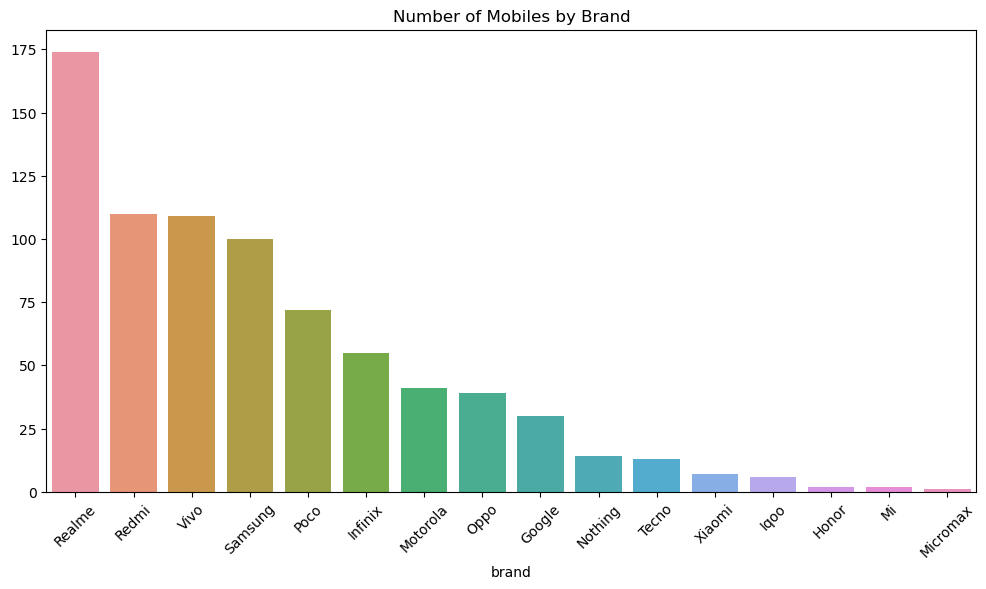

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['brand'].value_counts().index, y=df['brand'].value_counts().values)
plt.xticks(rotation=45)
plt.title('Number of Mobiles by Brand')
plt.show()

## 2. Price Distribution Across Brands.

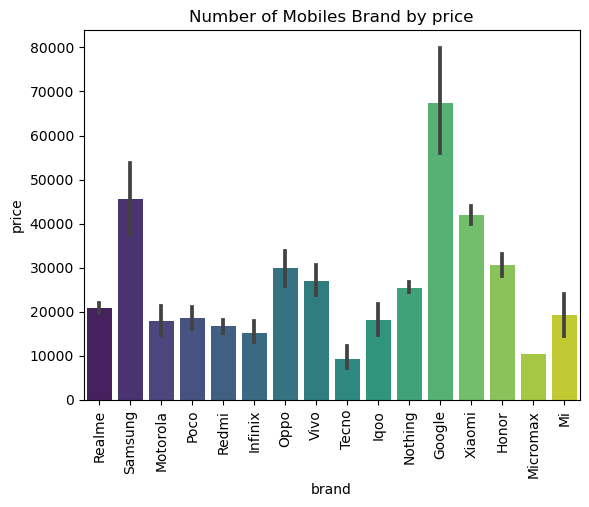

In [385]:
sns.barplot(data=df,x="brand",y="price",palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Mobiles Brand by price')
plt.show()

## 3. Distribution among storage capacities in mobiles.

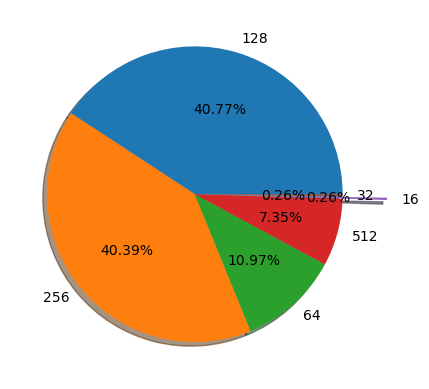

In [32]:
plt.pie(x=df["rom"].value_counts().values,labels=df["rom"].value_counts().index,autopct="%0.2f%%",explode = [0, 0, 0, 0, 0.3, 0], shadow = True)
plt.show()

## 4. Highest rating mobiles.

In [387]:
df.groupby("brand")["ratings"].max()

brand
Google        25452
Honor            80
Infinix      122406
Iqoo           4924
Mi            13262
Micromax      25577
Motorola     142514
Nothing       81607
Oppo         124863
Poco         189594
Realme       447811
Redmi       1168969
Samsung      302584
Tecno          3146
Vivo         447811
Xiaomi         1186
Name: ratings, dtype: int32

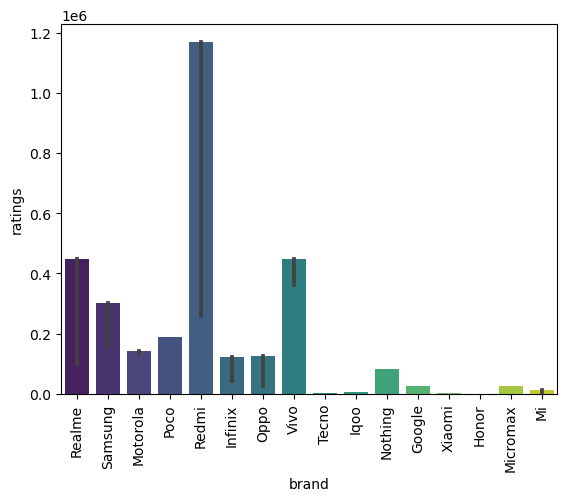

In [388]:
sns.barplot(data=df,x="brand",y='ratings',estimator=np.max,palette='viridis')
plt.xticks(rotation=90)
plt.show()

## 5. Extract the lowest-priced mobile phones for each brand.

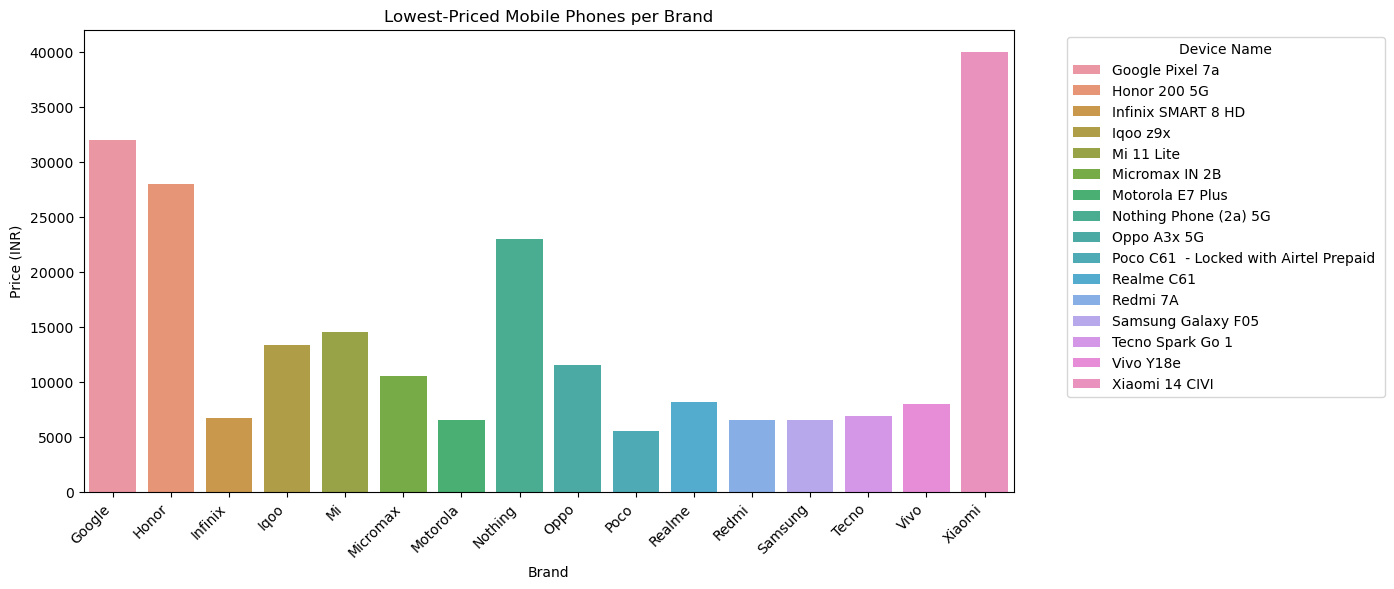

In [389]:
lowest_price_phones = df.groupby("brand").apply(lambda x: x.nsmallest(1, "price")).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(data=lowest_price_phones, x="brand", y="price", hue="device_name", dodge=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Brand")
plt.ylabel("Price (INR)")
plt.title("Lowest-Priced Mobile Phones per Brand")
plt.legend(title="Device Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 6. Extract the higest-priced mobile phones for each brand.

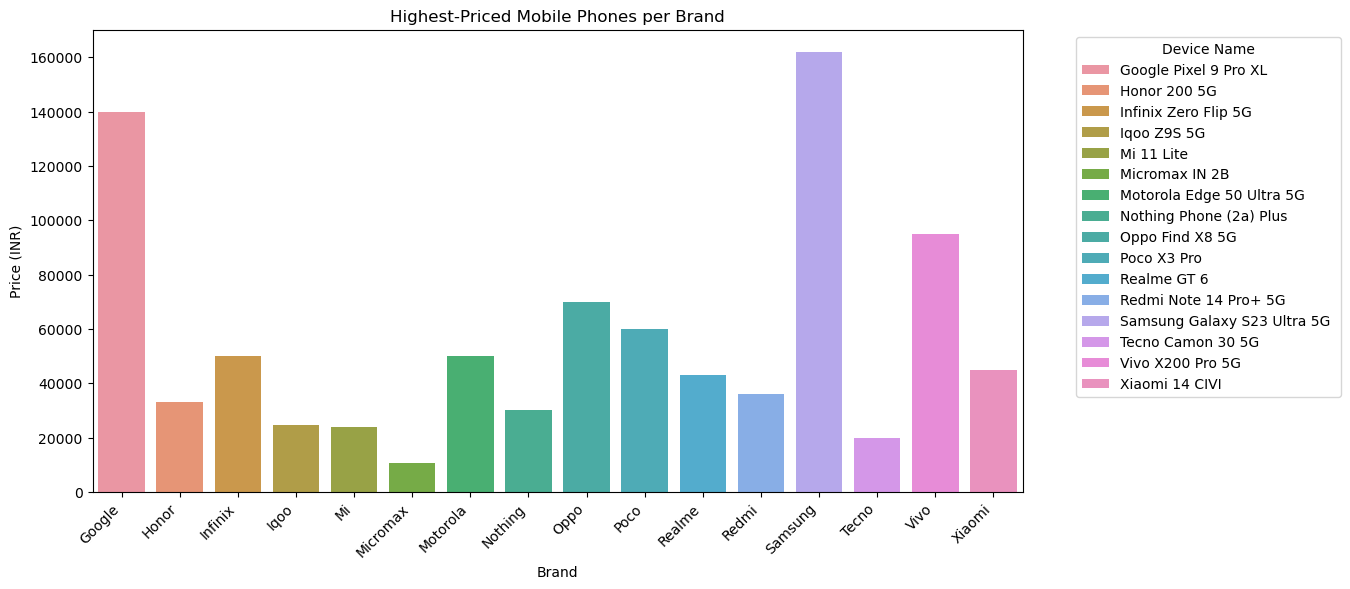

In [390]:
largest_display_phones = df.groupby("brand").apply(lambda x: x.nlargest(1, "price")).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(data=largest_display_phones, x="brand", y="price", hue="device_name", dodge=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Brand")
plt.ylabel("Price (INR)")
plt.title("Highest-Priced Mobile Phones per Brand")
plt.legend(title="Device Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 7. Impact of RAM & Storage on Price

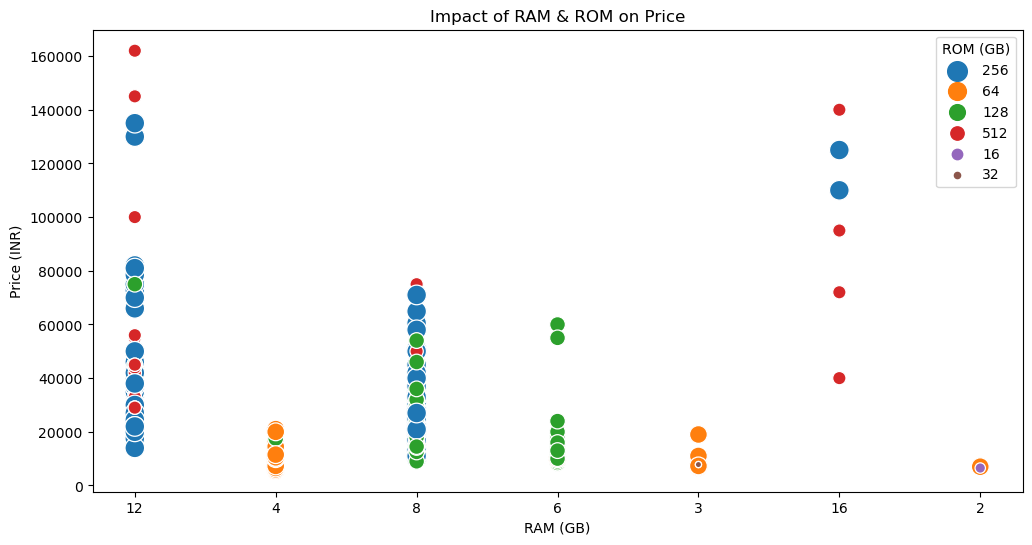

In [391]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='ram', y='price', hue='rom', size='rom', sizes=(20, 200))
plt.title("Impact of RAM & ROM on Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (INR)")
plt.legend(title="ROM (GB)")
plt.show()

## 8. 5G vs Non-5G Price Comparison

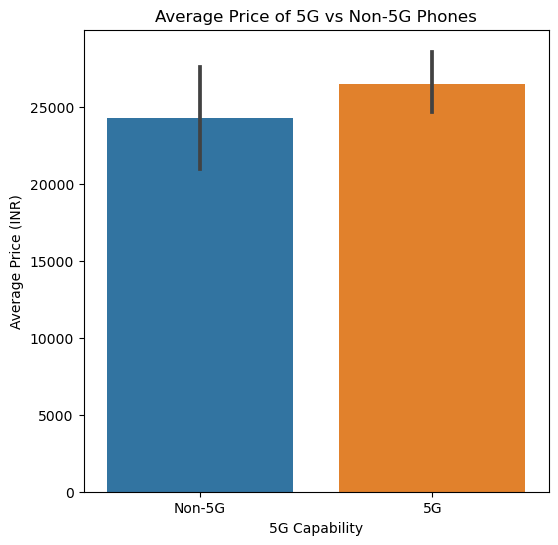

In [392]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='is_5g', y='price', estimator=lambda x: sum(x)/len(x))
plt.xticks([0, 1], ['Non-5G', '5G'])
plt.title("Average Price of 5G vs Non-5G Phones")
plt.xlabel("5G Capability")
plt.ylabel("Average Price (INR)")
plt.show()

## 9. Battery Capacity vs. Price

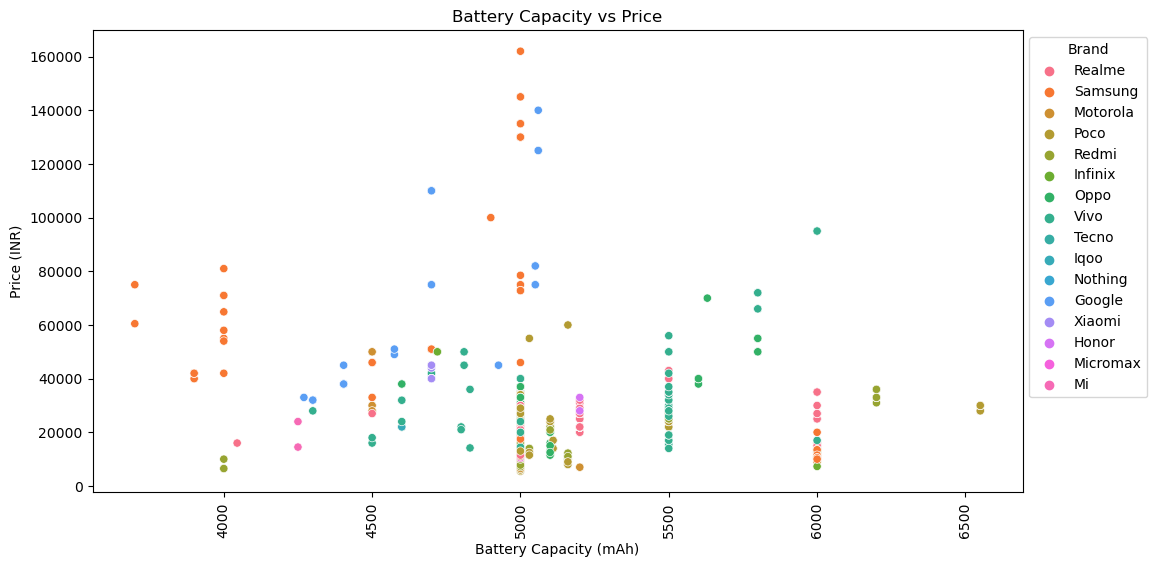

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='battery', y='price', hue='brand')
plt.title("Battery Capacity vs Price")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Price (INR)")
plt.xticks(rotation=90)
plt.legend(title="Brand", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## 10. Processor Brand vs. Average Price

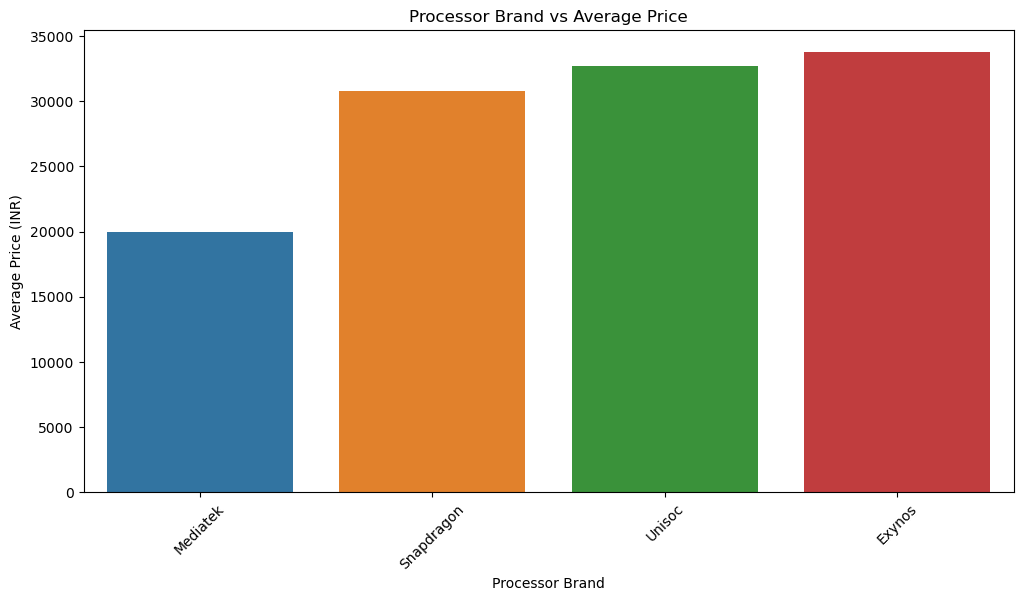

In [394]:
plt.figure(figsize=(12, 6))
processor_avg_price = df.groupby('processor_brand')['price'].mean().sort_values()
sns.barplot(x=processor_avg_price.index, y=processor_avg_price.values)
plt.xticks(rotation=45)
plt.title("Processor Brand vs Average Price")
plt.xlabel("Processor Brand")
plt.ylabel("Average Price (INR)")
plt.show()

## 11. Display Size vs. Price.

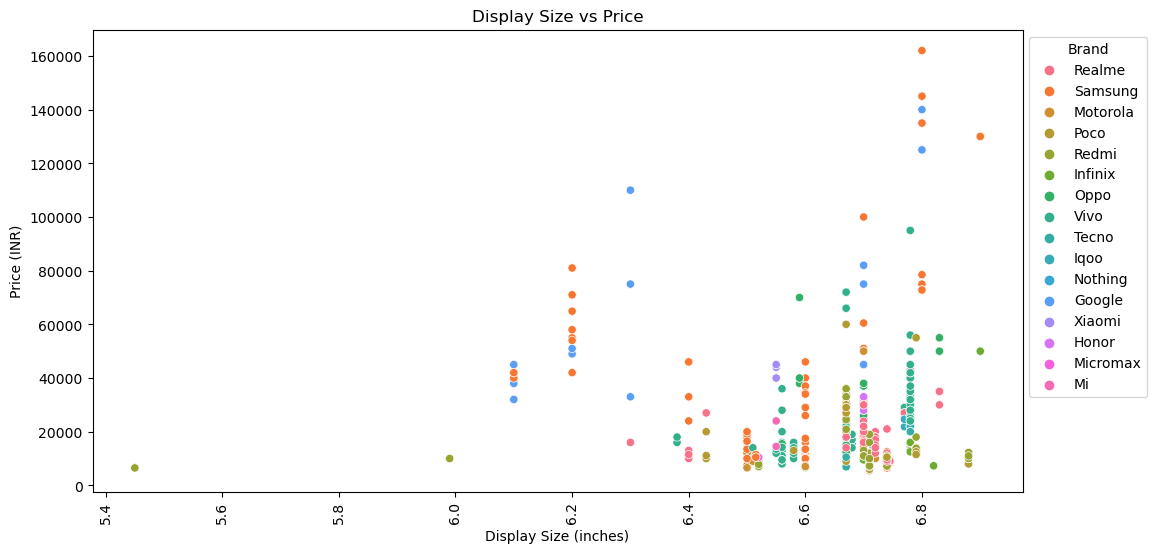

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='display_size', y='price', hue='brand')
plt.title("Display Size vs Price")
plt.xlabel("Display Size (inches)")
plt.ylabel("Price (INR)")
plt.xticks(rotation=90)
plt.legend(title="Brand", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## 12. Ratings vs. Price 

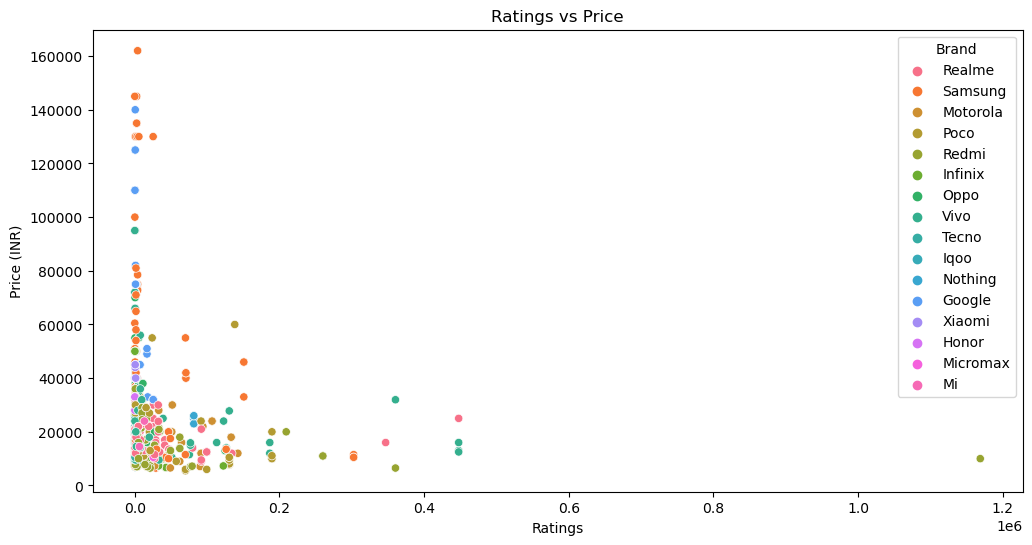

In [396]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='ratings', y='price', hue='brand')
plt.title("Ratings vs Price")
plt.xlabel("Ratings")
plt.ylabel("Price (INR)")
plt.legend(title="Brand")
plt.show()

## 13. RAM vs. Battery Capacity

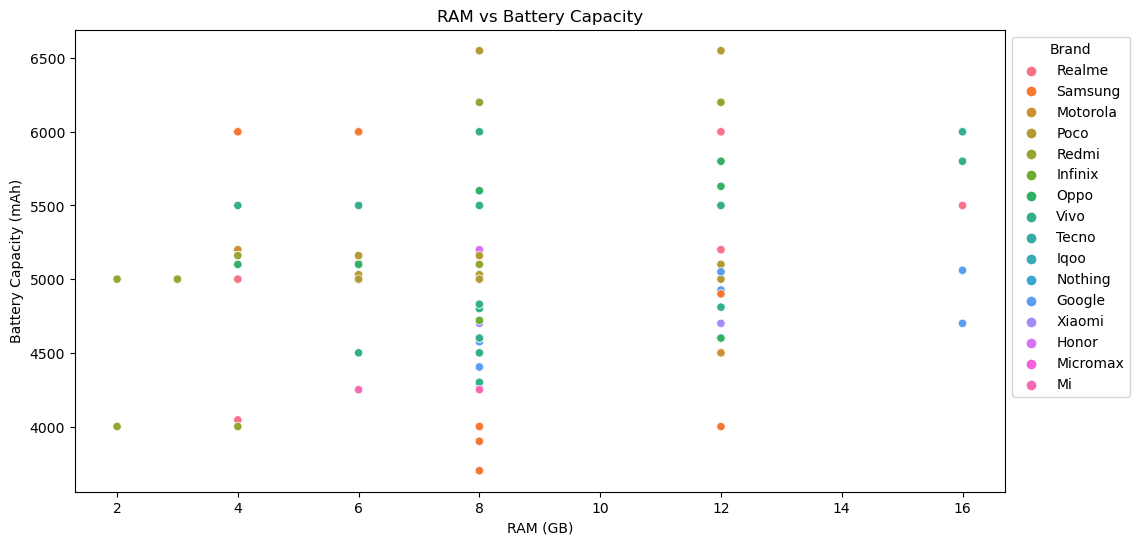

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='ram', y='battery', hue='brand')
plt.title("RAM vs Battery Capacity")
plt.xlabel("RAM (GB)")
plt.ylabel("Battery Capacity (mAh)")
plt.legend(title="Brand", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## 14. Correlation between price and features.

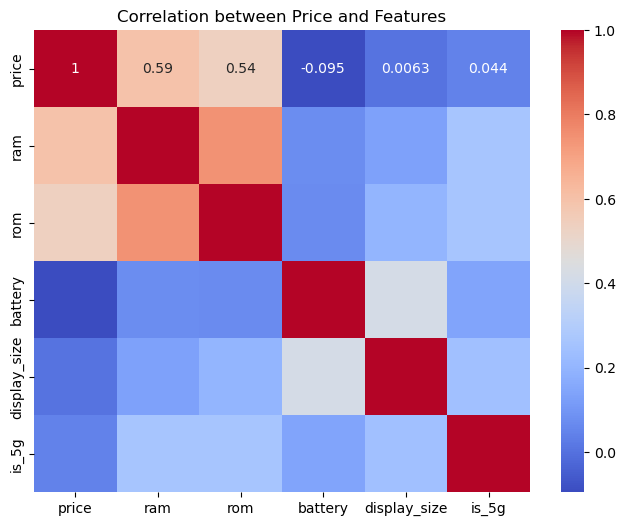

In [398]:
features = ['ram', 'rom', 'battery', 'display_size', 'is_5g']
correlation = df[['price'] + features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Price and Features')
plt.show()